# Divisional Demographic Analysis



The goal of this notebook is to output analyses of demographics by division and demographics. The top level folder has three subdirectories: `input`, `output` and `procedure`. `input` holds raw data, `output` holds the results of running analyses, and all analysis scripts are in `procedure`. 

This script assumes that you are running with `procedure` as your current working directory (i.e. from the `procedure` folder), such that input files will have paths like `../input/some_file.txt`. 

## Check available data files

In [204]:
import pandas as pd
from os import listdir
from os.path import join,splitext

#set the input directory path to ../input
#in a system independent fashion
data_dir = join("..","input")
output_dir = join("..","output")

#collect the names of all files in the data directory
input_filepaths = listdir(data_dir)

print(f"Available data files: {input_filepaths}")

Available data files: ['student_data_spring_2023.csv']


You should see 'student_data_spring_2023.csv` in the list of input files.

## Remove identifying data columns - only needs to be run once

Some data columns contain identifying data. We only want to work with de-identified data, so we will remove these, then save 'clean' tables for analysis 

In [205]:
identifying_columns = ["Student_Number","Local_Phone","perm_line_1","Student_Name",\
                       "Last_Name","First_Name","Middle_Name","Suffix","Preferred_Last",
                       "Local_Zip","Birthdate","Preferred_First","Preferred_Middle","Email","ExtEmail", 'Local_Address_1',\
                       'Local_Address_2', 'Local_City', 'Local_State', 'perm_line_2', 'perm_city', 'perm_state', 'perm_zip_5', 'perm_country', 'perm_postal_cd', 'LastSchoolName',]

for input_file_name in input_filepaths:
    student_data_path = join(data_dir,input_file_name)
    
    #Get the file extension (e.g. .txt, .csv, etc)
    root_file_name,file_extension = splitext(input_file_name)
    
    #Skip files that aren't csvs (note: you can export to csv from Excel)
    if file_extension != ".csv":
        print(f"Input file {input_filepath} is not a .csv file ...skipping")
    
    student_data = pd.read_csv(student_data_path)

    
    for col in identifying_columns:
        student_data = student_data.drop([col],axis=1)
        
    clean_student_data_path = join(output_dir,root_file_name + ".csv")
    
    majors = gender_and_major_df['Major1'].unique()
    
    #Codes translated from course catalog at https://www.uwb.edu/registrar/autumn-2023
    
    simplified_names = {"BEARTH":"Earth Systems Science","BIMD":"Interactive Media and Design",\
                        "B CORE":"University Studies and Programs - Discovey Core",\
                        "B CUSP": "University Studies and Programs - General Education Requirements",\
                        "B DATA": "Data Studies",\
                        "BJAPAN": "Japanese",\
                        "B LEAD": "Leadership",\
                        "B SPAIN": "Spanish",\
                        "B WRIT": "Writing",\
                        "B BUS": "Business",\
                        "B MBA": "Business (MBA)",\
                        "B BECN": "Business Economics",\
                        "ELCBUS": "Business in Bellevue",\
                        "B ACCT": "Accounting",\
                        "BEDUC" : "Education",\
                        "B ED"  : "Education",\
                        "LEDE"  : "Leadership Development for Educators",\
                        "BIS"   : "Interdisciplinary Studies",\
                        "BISSKL": "Interdisciplinary Study Skills",\
                        "BISAES": "American & Ethnic Studies",\
                        "BISCLA": "Culture, Literature, and the Arts",\
                        "BES"   : "Environmental Studies",\
                        "BISGWS": "Gender, Women and Sexuality Studies",\
                        "BISGST": "Global Studies",\
                        "BISIA" :"Interdisciplinary Arts",\
                        "BISLEP":"Law, Economics, and Public Policy",\
                        "BISMCS": "Media and Communication Studies",\
                        "BISPSY": "Psychology",\
                        "B PSY" : "Psychology",\
                        "BISSTS": "Science, Technology, and Society",\
                        "BISSTA": "Social Thought and Action",\
                        "BPOLST": "Master of Policy Studies",\
                        "BCULST": "Master of Cultural Studies",\
                        "BCWRIT": "Master of Fine Arts in Creative Writing and Poetics",\
                        "BHLTH" : "Health Electives",\
                        "BHS"   : "Health Studies",\
                        "B NURS" : "Nursing",\
                        "BST"   : "Science and Technology",\
                        "B BIO" : "Biology",\
                        "CSS"   : "Computing and Software Systems",\
                        "CSSSKL": "Computing and Software Systems Skills",\
                        "MCSS"  : "Computing and Software Systems (Masters)",\
                        "B CE"  : "Computer Engineering",\
                        "B ENGR": "Engineering",\
                        "B EE"  : "Electrical Engineering",\
                        "BEE"   : "Electrical Engineering",\
                        "B MATH": "Mathematics",\
                        "STMATH": "Mathematics",\
                        "B ME"  : "Mechanical Engineering",\
                        "B CHEM": "Chemistry",\
                        "B PHYS": "Physics",\
                        "MTV":"Mathematical Thinking and Visualization"}
    
    major_mapping = {"All Majors":"All Majors"}
    for m in majors:
        print(m)
        for s in simplified_names.keys():
            #print(s)
            if s in m:
                print(f"Shortening {m} to {simplified_names[s]}")
                major_mapping[m] = simplified_names[s]

    student_data = student_data.replace({"Major1":major_mapping,"Gender":{" ": "All Others"}})
    
    student_data.to_csv(clean_student_data_path)

0-BIOL-05-11
0-DESIGN-32-17
0-ECENG-00-16
0-ESS-30-15
0-FINANC-01-12
0-NURSX-00-16
0-PHARMC-00-27
0-SIMF-01-26
1-A CMPT-00-11
1-B ACCT-00-26
Shortening 1-B ACCT-00-26 to Accounting
1-B AES-00-11
1-B BIO-00-15
Shortening 1-B BIO-00-15 to Biology
1-B BUS-00-12
Shortening 1-B BUS-00-12 to Business
1-B BUS-05-12
Shortening 1-B BUS-05-12 to Business
1-B BUS-10-12
Shortening 1-B BUS-10-12 to Business
1-B BUS-20-12
Shortening 1-B BUS-20-12 to Business
1-B BUS-25-12
Shortening 1-B BUS-25-12 to Business
1-B BUS-30-12
Shortening 1-B BUS-30-12 to Business
1-B BUS-35-12
Shortening 1-B BUS-35-12 to Business
1-B BUS-40-12
Shortening 1-B BUS-40-12 to Business
1-B CHEM-00-11
Shortening 1-B CHEM-00-11 to Chemistry
1-B CHEM-00-15
Shortening 1-B CHEM-00-15 to Chemistry
1-B CHEM-10-15
Shortening 1-B CHEM-10-15 to Chemistry
1-B CLA-00-11
1-B CP-00-11
1-B CRS-00-15
1-B ED I-00-00
Shortening 1-B ED I-00-00 to Education
1-B EDSD-00-11
Shortening 1-B EDSD-00-11 to Education
1-B EDSD-10-11
Shortening 1-B EDSD-1

## Show the format of Student Data

In [206]:
student_data

,Count,Campus,FERPA_Block,Gender,Class,Residency,Ethnicity_Race,Ethnic_Long_Desc,Hispanic,Underrepresented,...,RequestedMajor2,RequestedMajor3,IntendedMajor1,IntendedMajor2,IntendedMajor3,honors_program,spcl_program,Applied_to_Graduate_yrqtr,LastSchoolTypeDesc,hs_grad_dt
0,1,Bothell,N,M,Senior,RESIDENT,HISPANIC,WHITE,GUATEMALAN ...,URM ...,...,NaN,NaN,NaN,NaN,NaN,,,Summer 2023,4 YEAR COLL OR UNIV,NaN
1,2,Bothell,N,F,Senior,RESIDENT,AFRO-AM,"BLACK/AFRICAN AMER, SOMALI",NOT HISPANIC ...,URM ...,...,NaN,NaN,NaN,NaN,NaN,,,Spring 2023,COMMUNITY COLLEGE,NaN
2,3,Bothell,Y,F,Junior,RESIDENT,AFRO-AM,"AFRICAN, BLACK/AFRICAN AMER, SOMALI",NOT HISPANIC ...,URM ...,...,NaN,NaN,NaN,NaN,NaN,,,NaN,COMMUNITY COLLEGE,NaN
3,4,Bothell,N,F,Freshman,RESIDENT,HISPANIC,NOT INDICATED,HISPANIC ...,URM ...,...,NaN,NaN,NaN,NaN,NaN,,STAFF/FAC EXEMPT,NaN,HIGH SCHOOL,06/01/2022
4,5,Bothell,Y,M,Senior,RESIDENT,ASIAN,FILIPINO,NOT HISPANIC ...,Not URM ...,...,NaN,NaN,NaN,NaN,NaN,,,Spring 2023,HIGH SCHOOL,06/01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,5263,Bothell,N,M,Junior,RESIDENT,TWO OR MORE,"SRI LANKAN, WHITE",NOT HISPANIC ...,Not URM ...,...,NaN,NaN,NaN,NaN,NaN,,,NaN,HIGH SCHOOL,06/01/2022
5263,5264,Bothell,N,M,Junior,RESIDENT,WHITE,WHITE,NOT HISPANIC ...,Not URM ...,...,NaN,NaN,NaN,NaN,NaN,,,NaN,COMMUNITY COLLEGE,NaN
5264,5265,Bothell,N,F,Junior,RESIDENT,TWO OR MORE,"FILIPINO, WHITE",NOT HISPANIC ...,Not URM ...,...,NaN,NaN,NaN,NaN,NaN,,,NaN,4 YEAR COLL OR UNIV,NaN
5265,5266,Bothell,Y,F,Junior,NONRES-CIT,HISPANIC,WHITE,CHILEAN ...,URM ...,...,NaN,NaN,NaN,NaN,NaN,,,NaN,4 YEAR COLL OR UNIV,NaN


In [207]:
data_columns = list(student_data.columns)
print("Student data columns:", data_columns)

Student data columns: ['Count', 'Campus', 'FERPA_Block', 'Gender', 'Class', 'Residency', 'Ethnicity_Race', 'Ethnic_Long_Desc', 'Hispanic', 'Underrepresented', 'First_Generation', 'First_Generation_4_Yr', 'Veteran', 'Veteran_Benefits', 'Disability', 'asuw', 'reg_hold', 'hold_office', 'hold_reason', 'ncr', 'admitted', 'appl_stat_descrip', 'appl_type_descrip', 'RegisFirstYrQtr', 'LastEnrolled', 'EnrollStatus', 'EnrollStatusDesc', 'Registered_in_Current_Qtr', 'Registered_Credits', 'Total_Credits', 'tot_extension', 'transfer_credits', 'uw_credits_earned', 'tot_grade_points', 'tot_graded_attmp', 'GPA', 'jr_col_gpa', 'sr_col_gpa', 'high_sch_gpa', 'Exemption_Status', 'Major1', 'DeptGPA1', 'Major2', 'DeptGPA2', 'Major3', 'DeptGPA3', 'Minor1', 'Minor1_Date', 'Minor2', 'Minor2_Date', 'Minor3', 'Minor3_Date', 'PendingMajor1', 'PendingMajor1_YrQtr', 'PendingMajor2', 'PendingMajor2_YrQtr', 'PendingMajor3', 'PendingMajor3_YrQtr', 'RequestedMajor1', 'RequestedMajor2', 'RequestedMajor3', 'IntendedMajor

## Graph of Frequency of Gender Categories for Campus vs. STEM

In [209]:
import seaborn as sns
from IPython.display import display,HTML



def summarize_demographics_by_division(student_data, demographic_col='Gender'):
    """Create a dataframe of demographics by division 
    
    student_data -- pandas dataframe of student data
    demographic col -- name of the column we want to compare (e.g. 'Gender', 'Underrepresented')
    
    """
    #Filter to just our columns of interest
    print(list(student_data.columns))
    major_data = student_data.loc[:,['Major1',demographic_col]]

    #Count how often each value occurs in this reduced table
    by_major_counts = major_data.value_counts()

    #Weird reset index step -- this converts our grouped series back into a 
    #regular 'ol DataFrame 
    by_major_counts = by_major_counts.reset_index()

    #Rename columns so they are more readable
    by_major_counts.columns = ['Major1',demographic_col,'Count']
    by_major_counts
    by_major_counts = by_major_counts.sort_values(['Major1',demographic_col])

    #Now repeat to get the campus gender counts
    campus_data = student_data.loc[:,[demographic_col]]
    #Count how often each value occurs in this reduced table
    campus_counts = campus_data.value_counts()
    campus_counts = campus_counts.reset_index()
    campus_counts.columns = [demographic_col,'Count']
    campus_counts['Major1'] = 'All Majors'
    campus_counts = campus_counts.sort_values(['Major1',demographic_col])

    major_df = pd.concat([by_major_counts,campus_counts])
    majors = major_df['Major1'].unique()


    major_df[f"Count_by_Major_and_{demographic_col}"] = major_df.groupby(["Major1",demographic_col])["Count"].transform('sum')
    major_df["Count_by_Major"] = major_df.groupby(["Major1"])["Count"].transform('sum')
    major_df[f"{demographic_col}_Frequency_within_Major"] =\
    major_df[f"Count_by_Major_and_{demographic_col}"]/major_df["Count_by_Major"]
    major_df = major_df.drop("Count",axis=1)
    major_df = major_df.drop_duplicates()
    return major_df


demographic_col = 'Ethnicity_Race'
major_df = summarize_demographics_by_division(student_data,demographic_col=demographic_col)
display(HTML(major_df.to_html()))

['Count', 'Campus', 'FERPA_Block', 'Gender', 'Class', 'Residency', 'Ethnicity_Race', 'Ethnic_Long_Desc', 'Hispanic', 'Underrepresented', 'First_Generation', 'First_Generation_4_Yr', 'Veteran', 'Veteran_Benefits', 'Disability', 'asuw', 'reg_hold', 'hold_office', 'hold_reason', 'ncr', 'admitted', 'appl_stat_descrip', 'appl_type_descrip', 'RegisFirstYrQtr', 'LastEnrolled', 'EnrollStatus', 'EnrollStatusDesc', 'Registered_in_Current_Qtr', 'Registered_Credits', 'Total_Credits', 'tot_extension', 'transfer_credits', 'uw_credits_earned', 'tot_grade_points', 'tot_graded_attmp', 'GPA', 'jr_col_gpa', 'sr_col_gpa', 'high_sch_gpa', 'Exemption_Status', 'Major1', 'DeptGPA1', 'Major2', 'DeptGPA2', 'Major3', 'DeptGPA3', 'Minor1', 'Minor1_Date', 'Minor2', 'Minor2_Date', 'Minor3', 'Minor3_Date', 'PendingMajor1', 'PendingMajor1_YrQtr', 'PendingMajor2', 'PendingMajor2_YrQtr', 'PendingMajor3', 'PendingMajor3_YrQtr', 'RequestedMajor1', 'RequestedMajor2', 'RequestedMajor3', 'IntendedMajor1', 'IntendedMajor2', 

,Major1,Ethnicity_Race,Count_by_Major_and_Ethnicity_Race,Count_by_Major,Ethnicity_Race_Frequency_within_Major
284,0-BIOL-05-11,ASIAN,1,1,1.000000
246,0-DESIGN-32-17,ASIAN,1,1,1.000000
216,0-ECENG-00-16,WHITE,1,1,1.000000
228,0-ESS-30-15,ASIAN,1,1,1.000000
212,0-FINANC-01-12,TWO OR MORE,1,1,1.000000
220,0-NURSX-00-16,ASIAN,1,1,1.000000
204,0-PHARMC-00-27,ASIAN,2,4,0.500000
193,0-PHARMC-00-27,WHITE,2,4,0.500000
219,0-SIMF-01-26,NOT IND,1,1,1.000000
170,1-A CMPT-00-11,AFRO-AM,3,77,0.038961


Plotting major: Mechanical Engineering


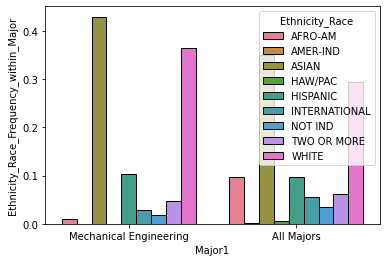

Plotting major: Psychology


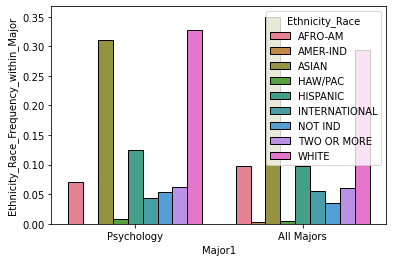

Plotting major: Computing and Software Systems


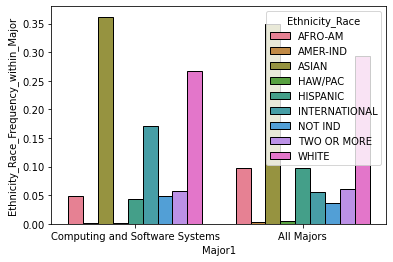

Plotting major: Biology


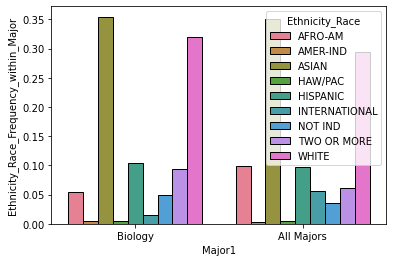

Plotting major: Chemistry


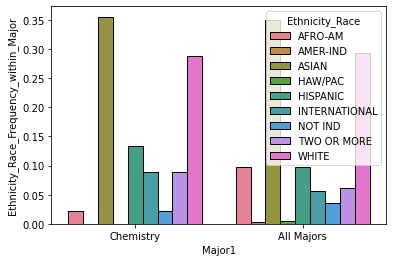

Plotting major: Nursing


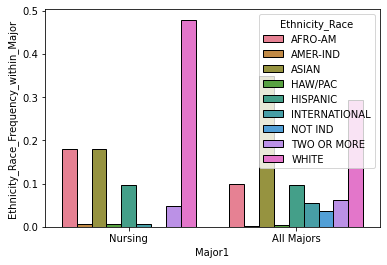

Plotting major: Physics


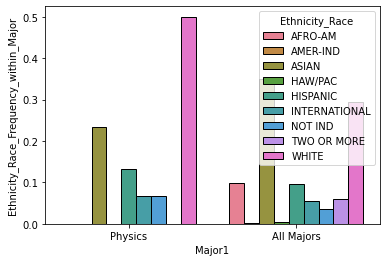

Plotting major: Master of Fine Arts in Creative Writing and Poetics


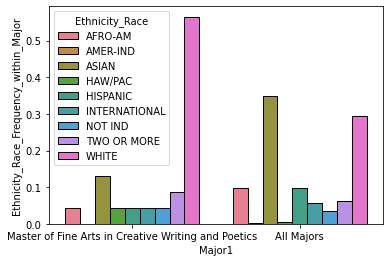

Plotting major: Accounting


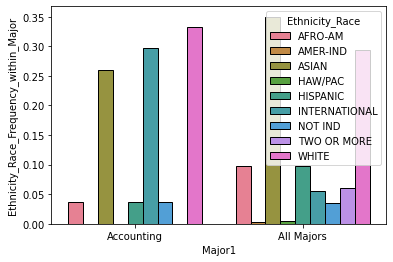

Plotting major: Master of Cultural Studies


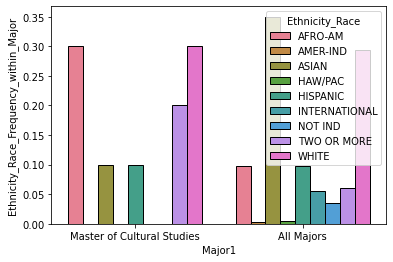

Plotting major: Education


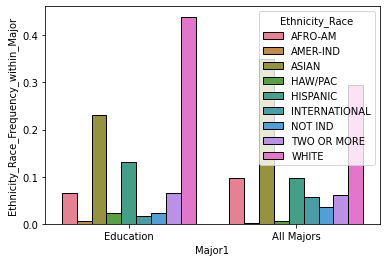

Plotting major: Business (MBA)


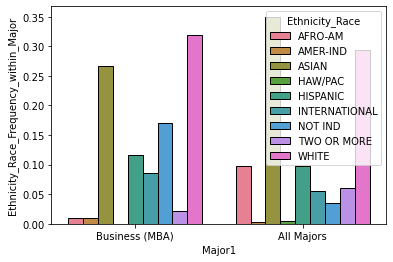

Plotting major: Business


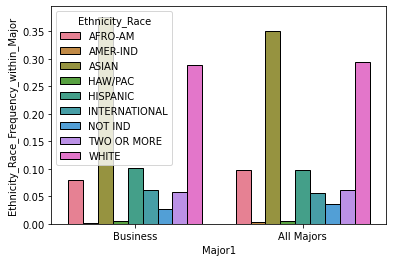

Plotting major: Environmental Studies


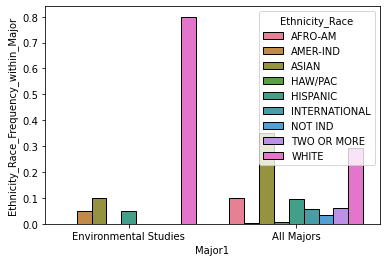

Plotting major: Mathematics


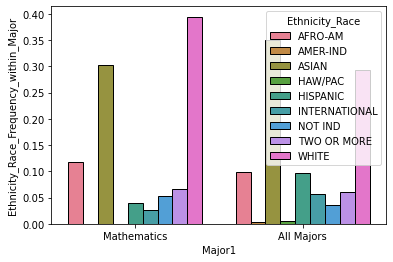

Plotting major: All Majors


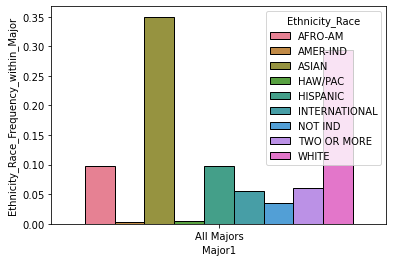

Plotting major: Master of Policy Studies


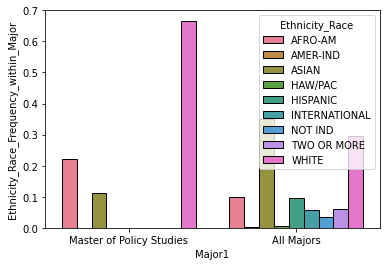

<Figure size 432x288 with 0 Axes>

In [210]:
import matplotlib.pyplot as plt

for major in list(set(major_mapping.values())):
    print(f"Plotting major: {major}")
    major_rows = major_df['Major1'] == major 
    campus_rows = major_df['Major1'] == 'All Majors'
    
    rows_to_keep = major_rows | campus_rows # logical element-wise OR
    curr_data = major_df[rows_to_keep]
    
    unique_demographic_values = sorted(list(curr_data[demographic_col].unique()))
    
    #colors = ["orange","cyan","green","pink","skyblue","purple","firebrick","brown","black","yellow"]
    #print(curr_data)
    
        
    #hue_order = ['F','M','All Others']
    hue_order = sorted(list(curr_data[demographic_col].unique()))
    #sns.barplot(x='Major1', y=f'{demographic_col}_Frequency_within_Major', hue='Underrepresented',hue_order=hue_order,\
    #  data=curr_data,palette=palette)
    palette = sns.color_palette("husl", len(unique_demographic_values))
    sns.barplot(x='Major1', y=f'{demographic_col}_Frequency_within_Major', hue=demographic_col,hue_order=hue_order,\
      data=curr_data,edgecolor="black",palette=palette)
    
    graph_output_file = join(output_dir,f"{major}_by_{demographic_col}")
    plt.savefig(graph_output_file)
    plt.show()
    plt.clf()

In [217]:
import matplotlib.pyplot as plt


def get_campus_fraction(df,demographic_col,focal_category,all_majors_category='All Majors',verbose=True):
    result =  get_major_fraction(df,demographic_col,focal_category,major=all_majors_category,verbose=verbose)
    return result

def get_major_fraction(df,demographic_col,focal_category,major='Biology',verbose=True):
    category_count = df[(df[demographic_col] == focal_category) & (df['Major1'] == major)][f'Count_by_Major_and_{demographic_col}'].sum()
    non_category_count = df[(df[demographic_col] != focal_category) & (df['Major1'] == major)][f'Count_by_Major_and_{demographic_col}'].sum()
    total = category_count + non_category_count
    category_fraction =\
    category_count / total
    rounded_percentage = round(category_fraction*100,1) 
    print(f" {category_count} ({rounded_percentage} %) of {total} students in {major}, are listed as {demographic_col} = {focal_category}" )
    return category_count,non_category_count,category_fraction

def get_major_ratio(df,demographic_col,focal_category,major='Biology',all_majors_category='All Majors',verbose=True):
    _,_,category_fraction= get_major_fraction(df,demographic_col,focal_category,major=major,verbose=verbose)  
    _,_,campus_category_fraction = get_campus_fraction(df,demographic_col,focal_category,verbose=verbose)
    return category_fraction/campus_category_fraction

In [267]:
data = []

for focal_category in sorted(list(df[demographic_col].unique())):
    #print(f"Analyzing {demographic_col} == {focal_category}")
    
    #Calculate demographics across all majors
    campus_category_count,campus_non_category_count,campus_category_fraction = get_campus_fraction(df,demographic_col,focal_category)


    df[f'Campus_{demographic_col}_count'] = campus_category_count
    df[f'Campus_non-{demographic_col}_count'] = campus_non_category_count
    df[f'Campus_{demographic_col}_fraction'] = campus_category_fraction
    
    for major in list(set(major_mapping.values())):
        
        #Calculate demographics in this major
        category_count,non_category_count,category_fraction =\
          get_major_fraction(df,demographic_col,focal_category,major=major)
        
        major_ratio = get_major_ratio(df,demographic_col,focal_category,major=major)

        row_data = {"Major1":major,f"{demographic_col}":focal_category,\
                    "Y":category_count,"N":non_category_count,\
                    "Percent": round(category_fraction*100,3),\
                    "Y(Campus)":campus_category_count,\
                    "N(Campus)":campus_non_category_count,\
                    "Percent(Campus)":round(campus_category_fraction*100,3),\
                    "Ratio_in_Major_vs_Campus":major_ratio
                    }
        data.append(row_data)
        
graph_data = pd.DataFrame(data)   
display(HTML(graph_data.to_html()))

 517 (9.8 %) of 5267 students in All Majors, are listed as Ethnicity_Race = AFRO-AM
 1 (0.9 %) of 107 students in Mechanical Engineering, are listed as Ethnicity_Race = AFRO-AM
 1 (0.9 %) of 107 students in Mechanical Engineering, are listed as Ethnicity_Race = AFRO-AM
 517 (9.8 %) of 5267 students in All Majors, are listed as Ethnicity_Race = AFRO-AM
 8 (7.1 %) of 113 students in Psychology, are listed as Ethnicity_Race = AFRO-AM
 8 (7.1 %) of 113 students in Psychology, are listed as Ethnicity_Race = AFRO-AM
 517 (9.8 %) of 5267 students in All Majors, are listed as Ethnicity_Race = AFRO-AM
 35 (4.8 %) of 732 students in Computing and Software Systems, are listed as Ethnicity_Race = AFRO-AM
 35 (4.8 %) of 732 students in Computing and Software Systems, are listed as Ethnicity_Race = AFRO-AM
 517 (9.8 %) of 5267 students in All Majors, are listed as Ethnicity_Race = AFRO-AM
 11 (5.4 %) of 203 students in Biology, are listed as Ethnicity_Race = AFRO-AM
 11 (5.4 %) of 203 students in Bi

 42 (23.1 %) of 182 students in Education, are listed as Ethnicity_Race = ASIAN
 1843 (35.0 %) of 5267 students in All Majors, are listed as Ethnicity_Race = ASIAN
 25 (26.6 %) of 94 students in Business (MBA), are listed as Ethnicity_Race = ASIAN
 25 (26.6 %) of 94 students in Business (MBA), are listed as Ethnicity_Race = ASIAN
 1843 (35.0 %) of 5267 students in All Majors, are listed as Ethnicity_Race = ASIAN
 305 (37.7 %) of 810 students in Business, are listed as Ethnicity_Race = ASIAN
 305 (37.7 %) of 810 students in Business, are listed as Ethnicity_Race = ASIAN
 1843 (35.0 %) of 5267 students in All Majors, are listed as Ethnicity_Race = ASIAN
 2 (10.0 %) of 20 students in Environmental Studies, are listed as Ethnicity_Race = ASIAN
 2 (10.0 %) of 20 students in Environmental Studies, are listed as Ethnicity_Race = ASIAN
 1843 (35.0 %) of 5267 students in All Majors, are listed as Ethnicity_Race = ASIAN
 23 (30.3 %) of 76 students in Mathematics, are listed as Ethnicity_Race = A

 4 (2.2 %) of 182 students in Education, are listed as Ethnicity_Race = NOT IND
 4 (2.2 %) of 182 students in Education, are listed as Ethnicity_Race = NOT IND
 189 (3.6 %) of 5267 students in All Majors, are listed as Ethnicity_Race = NOT IND
 16 (17.0 %) of 94 students in Business (MBA), are listed as Ethnicity_Race = NOT IND
 16 (17.0 %) of 94 students in Business (MBA), are listed as Ethnicity_Race = NOT IND
 189 (3.6 %) of 5267 students in All Majors, are listed as Ethnicity_Race = NOT IND
 22 (2.7 %) of 810 students in Business, are listed as Ethnicity_Race = NOT IND
 22 (2.7 %) of 810 students in Business, are listed as Ethnicity_Race = NOT IND
 189 (3.6 %) of 5267 students in All Majors, are listed as Ethnicity_Race = NOT IND
 0 (0.0 %) of 20 students in Environmental Studies, are listed as Ethnicity_Race = NOT IND
 0 (0.0 %) of 20 students in Environmental Studies, are listed as Ethnicity_Race = NOT IND
 189 (3.6 %) of 5267 students in All Majors, are listed as Ethnicity_Race 

 6 (66.7 %) of 9 students in Master of Policy Studies, are listed as Ethnicity_Race = WHITE
 1549 (29.4 %) of 5267 students in All Majors, are listed as Ethnicity_Race = WHITE


,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus
0,Mechanical Engineering,AFRO-AM,1,106,0.935,517,4750,9.816,0.095211
1,Psychology,AFRO-AM,8,105,7.080,517,4750,9.816,0.721247
2,Computing and Software Systems,AFRO-AM,35,697,4.781,517,4750,9.816,0.487113
3,Biology,AFRO-AM,11,192,5.419,517,4750,9.816,0.552039
4,Chemistry,AFRO-AM,1,44,2.222,517,4750,9.816,0.226392
5,Nursing,AFRO-AM,30,137,17.964,517,4750,9.816,1.830112
6,Physics,AFRO-AM,0,30,0.000,517,4750,9.816,0.000000
7,Master of Fine Arts in Creative Writing and Poetics,AFRO-AM,1,22,4.348,517,4750,9.816,0.442940
8,Accounting,AFRO-AM,1,26,3.704,517,4750,9.816,0.377319
9,Master of Cultural Studies,AFRO-AM,3,7,30.000,517,4750,9.816,3.056286


In [279]:
#To calculate whether over/underrepresentation is significant

import statsmodels.stats.proportion as smprop

def CI_from_row(row):
    count1 = row["Y"]
    nobs1 = row["Y"] + row["N"]
    count2 = row["Y(Campus)"]
    nobs2 = row["Y(Campus)"] + row["N(Campus)"]
    print(count1,nobs1,count2,nobs2)
    #Test 95% Confidence interval, using a method that tests the ratio of proprotions
    result = smprop.confint_proportions_2indep(count1,nobs1,count2,nobs2, compare= 'ratio')
    return result
    
result = graph_data.apply(CI_from_row,axis=1)
CI95_low = [r[0] for r in result]
CI95_high = [r[1] for r in result]
#print(CI95_low,CI95_high)
graph_data["CI95_low"] = CI95_low
graph_data["CI95_high"] = CI95_high

#Although we already have the CI
#for graphing purposes it's more 
#straightforward to express the 
#length from the upper and lower CI95
#to the mean so we can draw error bars

graph_data["Lower_Error"] = [i for i in map(float,abs(graph_data["Ratio_in_Major_vs_Campus"] - CI95_low))]
graph_data["Upper_Error"] = [i for i in map(float,abs(CI95_high -graph_data["Ratio_in_Major_vs_Campus"]))]
display(HTML(graph_data.to_html()))

1 107 517 5267
8 113 517 5267
35 732 517 5267
11 203 517 5267
1 45 517 5267
30 167 517 5267
0 30 517 5267
1 23 517 5267
1 27 517 5267
3 10 517 5267
12 182 517 5267
1 94 517 5267
65 810 517 5267
0 20 517 5267
9 76 517 5267
517 5267 517 5267
2 9 517 5267
0 107 14 5267
0 113 14 5267
1 732 14 5267
1 203 14 5267
0 45 14 5267
1 167 14 5267
0 30 14 5267
0 23 14 5267
0 27 14 5267
0 10 14 5267
1 182 14 5267
1 94 14 5267
1 810 14 5267
1 20 14 5267
0 76 14 5267
14 5267 14 5267
0 9 14 5267
46 107 1843 5267
35 113 1843 5267
265 732 1843 5267
72 203 1843 5267
16 45 1843 5267
30 167 1843 5267
7 30 1843 5267
3 23 1843 5267
7 27 1843 5267
1 10 1843 5267
42 182 1843 5267
25 94 1843 5267
305 810 1843 5267
2 20 1843 5267
23 76 1843 5267
1843 5267 1843 5267
1 9 1843 5267
0 107 28 5267
1 113 28 5267
1 732 28 5267
1 203 28 5267
0 45 28 5267
1 167 28 5267
0 30 28 5267
1 23 28 5267
0 27 28 5267
0 10 28 5267
4 182 28 5267
0 94 28 5267
4 810 28 5267
0 20 28 5267
0 76 28 5267
28 5267 28 5267
0 9 28 5267
11 107 51

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
0,Mechanical Engineering,AFRO-AM,1,106,0.935,517,4750,9.816,0.095211,0.028928,0.697314,0.066283,0.602103
1,Psychology,AFRO-AM,8,105,7.080,517,4750,9.816,0.721247,0.397250,1.462753,0.323998,0.741505
2,Computing and Software Systems,AFRO-AM,35,697,4.781,517,4750,9.816,0.487113,0.354241,0.686959,0.132872,0.199846
3,Biology,AFRO-AM,11,192,5.419,517,4750,9.816,0.552039,0.326168,1.014410,0.225870,0.462371
4,Chemistry,AFRO-AM,1,44,2.222,517,4750,9.816,0.226392,0.069406,1.622363,0.156985,1.395972
5,Nursing,AFRO-AM,30,137,17.964,517,4750,9.816,1.830112,1.330854,2.581237,0.499257,0.751126
6,Physics,AFRO-AM,0,30,0.000,517,4750,9.816,0.000000,0.010665,2.610754,0.010665,2.610754
7,Master of Fine Arts in Creative Writing and Poetics,AFRO-AM,1,22,4.348,517,4750,9.816,0.442940,0.137823,3.062754,0.305117,2.619814
8,Accounting,AFRO-AM,1,26,3.704,517,4750,9.816,0.377319,0.116879,2.637357,0.260440,2.260038
9,Master of Cultural Studies,AFRO-AM,3,7,30.000,517,4750,9.816,3.056286,1.436755,8.012410,1.619531,4.956123


,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
8,Accounting,AFRO-AM,1,26,3.704,517,4750,9.816,0.377319,0.116879,2.637357,0.260440,2.260038
25,Accounting,AMER-IND,0,27,0.000,14,5253,0.266,0.000000,0.403997,107.986549,0.403997,107.986549
42,Accounting,ASIAN,7,20,25.926,1843,3424,34.991,0.740922,0.422809,1.436267,0.318112,0.695346
59,Accounting,HAW/PAC,0,27,0.000,28,5239,0.532,0.000000,0.210406,53.670614,0.210406,53.670614
76,Accounting,HISPANIC,1,26,3.704,511,4756,9.702,0.381750,0.118247,2.668369,0.263503,2.286619
93,Accounting,INTERNATIONAL,8,19,29.630,295,4972,5.601,5.290144,3.116960,9.739471,2.173185,4.449327
110,Accounting,NOT IND,1,26,3.704,189,5078,3.588,1.032138,0.317870,7.231998,0.714268,6.199860
127,Accounting,TWO OR MORE,0,27,0.000,321,4946,6.095,0.000000,0.019072,4.653018,0.019072,4.653018
144,Accounting,WHITE,9,18,33.333,1549,3718,29.410,1.133419,0.700869,1.967754,0.432550,0.834334


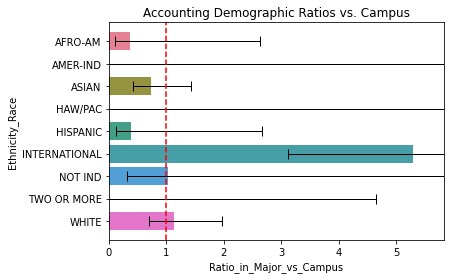

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
15,All Majors,AFRO-AM,517,4750,9.816,517,4750,9.816,1.0,0.890738,1.122665,0.109262,0.122665
32,All Majors,AMER-IND,14,5253,0.266,14,5253,0.266,1.0,0.483400,2.068678,0.516600,1.068678
49,All Majors,ASIAN,1843,3424,34.991,1843,3424,34.991,1.0,0.949283,1.053427,0.050717,0.053427
66,All Majors,HAW/PAC,28,5239,0.532,28,5239,0.532,1.0,0.595830,1.678332,0.404170,0.678332
83,All Majors,HISPANIC,511,4756,9.702,511,4756,9.702,1.0,0.890070,1.123507,0.109930,0.123507
100,All Majors,INTERNATIONAL,295,4972,5.601,295,4972,5.601,1.0,0.854998,1.169593,0.145002,0.169593
117,All Majors,NOT IND,189,5078,3.588,189,5078,3.588,1.0,0.820618,1.218594,0.179382,0.218594
134,All Majors,TWO OR MORE,321,4946,6.095,321,4946,6.095,1.0,0.860884,1.161596,0.139116,0.161596
151,All Majors,WHITE,1549,3718,29.410,1549,3718,29.410,1.0,0.942557,1.060944,0.057443,0.060944


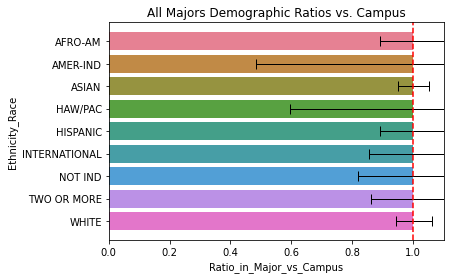

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
3,Biology,AFRO-AM,11,192,5.419,517,4750,9.816,0.552039,0.326168,1.014410,0.225870,0.462371
20,Biology,AMER-IND,1,202,0.493,14,5253,0.266,1.853272,0.501457,14.298597,1.351816,12.445325
37,Biology,ASIAN,72,131,35.468,1843,3424,34.991,1.013618,0.843238,1.228910,0.170380,0.215291
54,Biology,HAW/PAC,1,202,0.493,28,5239,0.532,0.926636,0.265354,6.994343,0.661282,6.067707
71,Biology,HISPANIC,21,182,10.345,511,4756,9.702,1.066266,0.723404,1.636383,0.342862,0.570117
88,Biology,INTERNATIONAL,3,200,1.478,295,4972,5.601,0.263856,0.107879,0.871296,0.155977,0.607440
105,Biology,NOT IND,10,193,4.926,189,5078,3.588,1.372794,0.782880,2.627517,0.589915,1.254722
122,Biology,TWO OR MORE,19,184,9.360,321,4946,6.095,1.535733,1.016057,2.425880,0.519676,0.890147
139,Biology,WHITE,65,138,32.020,1549,3718,29.410,1.088753,0.892472,1.341482,0.196280,0.252730


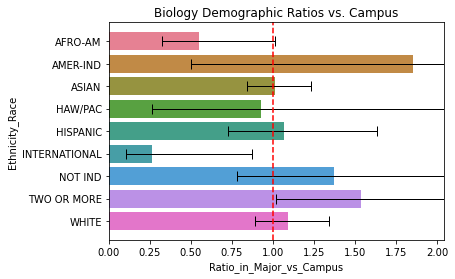

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
12,Business,AFRO-AM,65,745,8.025,517,4750,9.816,0.817525,0.643087,1.052192,0.174438,0.234667
29,Business,AMER-IND,1,809,0.123,14,5253,0.266,0.464462,0.125376,3.605247,0.339086,3.140785
46,Business,ASIAN,305,505,37.654,1843,3424,34.991,1.076100,0.978561,1.185363,0.097539,0.109262
63,Business,HAW/PAC,4,806,0.494,28,5239,0.532,0.928924,0.380748,2.765675,0.548177,1.836751
80,Business,HISPANIC,82,728,10.123,511,4756,9.702,1.043449,0.840840,1.306791,0.202609,0.263342
97,Business,INTERNATIONAL,50,760,6.173,295,4972,5.601,1.102113,0.831793,1.483049,0.270320,0.380935
114,Business,NOT IND,22,788,2.716,189,5078,3.588,0.756901,0.501601,1.187111,0.255300,0.430210
131,Business,TWO OR MORE,47,763,5.802,321,4946,6.095,0.952075,0.714507,1.290393,0.237568,0.338318
148,Business,WHITE,234,576,28.889,1549,3718,29.410,0.982297,0.876083,1.104233,0.106214,0.121936


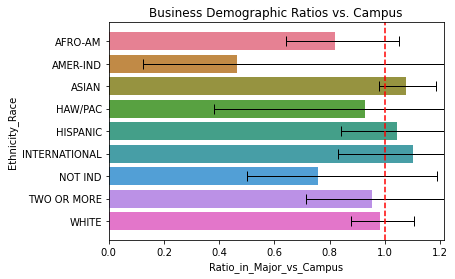

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
11,Business (MBA),AFRO-AM,1,93,1.064,517,4750,9.816,0.108379,0.032959,0.792016,0.075420,0.683637
28,Business (MBA),AMER-IND,1,93,1.064,14,5253,0.266,4.002280,1.086911,30.591317,2.915369,26.589037
45,Business (MBA),ASIAN,25,69,26.596,1843,3424,34.991,0.760064,0.552268,1.076440,0.207796,0.316376
62,Business (MBA),HAW/PAC,0,94,0.000,28,5239,0.532,0.000000,0.060148,15.899164,0.060148,15.899164
79,Business (MBA),HISPANIC,11,83,11.702,511,4756,9.702,1.206166,0.724577,2.167531,0.481590,0.961365
96,Business (MBA),INTERNATIONAL,8,86,8.511,295,4972,5.601,1.519510,0.836354,3.073819,0.683156,1.554310
113,Business (MBA),NOT IND,16,78,17.021,189,5078,3.588,4.743443,3.063523,7.689068,1.679919,2.945626
130,Business (MBA),TWO OR MORE,2,92,2.128,321,4946,6.095,0.349109,0.126989,1.479443,0.222120,1.130335
147,Business (MBA),WHITE,30,64,31.915,1549,3718,29.410,1.085189,0.816858,1.473722,0.268331,0.388533


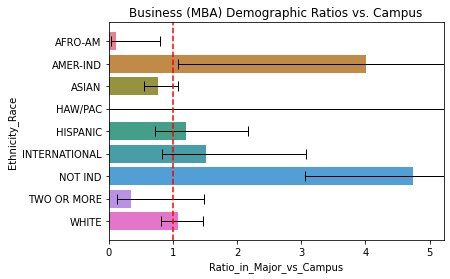

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
4,Chemistry,AFRO-AM,1,44,2.222,517,4750,9.816,0.226392,0.069406,1.622363,0.156985,1.395972
21,Chemistry,AMER-IND,0,45,0.000,14,5253,0.266,0.000000,0.241775,65.914052,0.241775,65.914052
38,Chemistry,ASIAN,16,29,35.556,1843,3424,34.991,1.016121,0.703683,1.525777,0.312438,0.509656
55,Chemistry,HAW/PAC,0,45,0.000,28,5239,0.532,0.000000,0.125909,32.762797,0.125909,32.762797
72,Chemistry,HISPANIC,6,39,13.333,511,4756,9.702,1.374299,0.718615,3.011793,0.655683,1.637495
89,Chemistry,INTERNATIONAL,4,41,8.889,295,4972,5.601,1.587043,0.728318,4.267519,0.858725,2.680475
106,Chemistry,NOT IND,1,44,2.222,189,5078,3.588,0.619283,0.188770,4.448540,0.430513,3.829257
123,Chemistry,TWO OR MORE,4,41,8.889,321,4946,6.095,1.458498,0.669816,3.920068,0.788681,2.461570
140,Chemistry,WHITE,13,32,28.889,1549,3718,29.410,0.982297,0.643583,1.580760,0.338714,0.598463


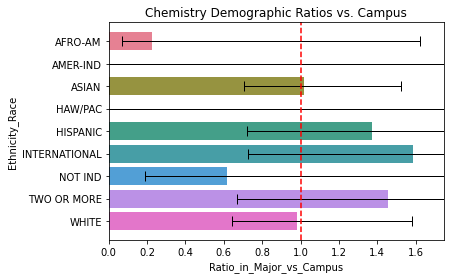

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
2,Computing and Software Systems,AFRO-AM,35,697,4.781,517,4750,9.816,0.487113,0.354241,0.686959,0.132872,0.199846
19,Computing and Software Systems,AMER-IND,1,731,0.137,14,5253,0.266,0.513954,0.138747,3.988552,0.375206,3.474598
36,Computing and Software Systems,ASIAN,265,467,36.202,1843,3424,34.991,1.034601,0.934435,1.147856,0.100165,0.113255
53,Computing and Software Systems,HAW/PAC,1,731,0.137,28,5239,0.532,0.256977,0.073413,1.951241,0.183564,1.694265
70,Computing and Software Systems,HISPANIC,32,700,4.372,511,4756,9.702,0.450590,0.323263,0.645822,0.127326,0.195232
87,Computing and Software Systems,INTERNATIONAL,125,607,17.077,295,4972,5.601,3.048879,2.515536,3.707966,0.533343,0.659087
104,Computing and Software Systems,NOT IND,35,697,4.781,189,5078,3.588,1.332473,0.949310,1.911719,0.383163,0.579246
121,Computing and Software Systems,TWO OR MORE,42,690,5.738,321,4946,6.095,0.941448,0.696931,1.296641,0.244517,0.355193
138,Computing and Software Systems,WHITE,196,536,26.776,1549,3718,29.410,0.910452,0.803414,1.035134,0.107038,0.124682


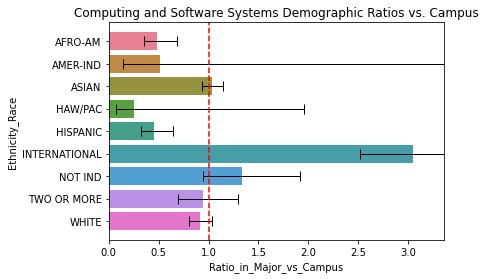

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
10,Education,AFRO-AM,12,170,6.593,517,4750,9.816,0.671711,0.405766,1.197863,0.265945,0.526152
27,Education,AMER-IND,1,181,0.549,14,5253,0.266,2.067111,0.559521,15.933580,1.507590,13.866468
44,Education,ASIAN,42,140,23.077,1843,3424,34.991,0.659502,0.510055,0.868077,0.149447,0.208575
61,Education,HAW/PAC,4,178,2.198,28,5239,0.532,4.134223,1.704960,12.181600,2.429262,8.047377
78,Education,HISPANIC,24,158,13.187,511,4756,9.702,1.359197,0.947774,2.016600,0.411423,0.657403
95,Education,INTERNATIONAL,3,179,1.648,295,4972,5.601,0.294301,0.120417,0.970544,0.173883,0.676244
112,Education,NOT IND,4,178,2.198,189,5078,3.588,0.612477,0.272295,1.725246,0.340183,1.112768
129,Education,TWO OR MORE,12,170,6.593,321,4946,6.095,1.081853,0.650424,1.936177,0.431429,0.854325
146,Education,WHITE,80,102,43.956,1549,3718,29.410,1.494619,1.266866,1.774849,0.227753,0.280230


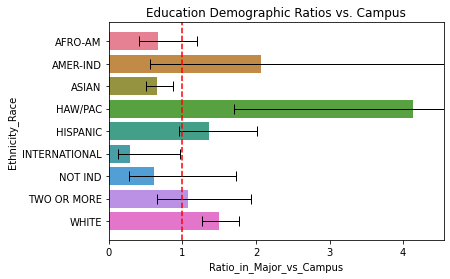

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
13,Environmental Studies,AFRO-AM,0,20,0.0,517,4750,9.816,0.000000,0.016046,3.841059,0.016046,3.841059
30,Environmental Studies,AMER-IND,1,19,5.0,14,5253,0.266,18.810714,5.238721,134.872258,13.571993,116.061544
47,Environmental Studies,ASIAN,2,18,10.0,1843,3424,34.991,0.285784,0.109003,1.113922,0.176781,0.828138
64,Environmental Studies,HAW/PAC,0,20,0.0,28,5239,0.532,0.000000,0.284695,71.379157,0.284695,71.379157
81,Environmental Studies,HISPANIC,1,19,5.0,511,4756,9.702,0.515362,0.161082,3.524882,0.354280,3.009520
98,Environmental Studies,INTERNATIONAL,0,20,0.0,295,4972,5.601,0.000000,0.028072,6.733579,0.028072,6.733579
115,Environmental Studies,NOT IND,0,20,0.0,189,5078,3.588,0.000000,0.043717,10.514057,0.043717,10.514057
132,Environmental Studies,TWO OR MORE,0,20,0.0,321,4946,6.095,0.000000,0.025807,6.187841,0.025807,6.187841
149,Environmental Studies,WHITE,16,4,80.0,1549,3718,29.410,2.720207,2.201977,3.399956,0.518230,0.679749


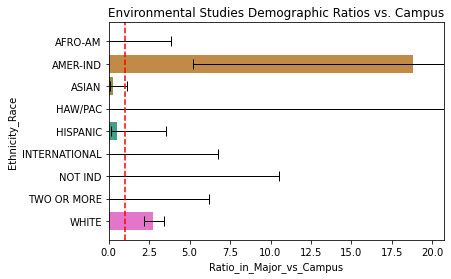

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
9,Master of Cultural Studies,AFRO-AM,3,7,30.0,517,4750,9.816,3.056286,1.436755,8.012410,1.619531,4.956123
26,Master of Cultural Studies,AMER-IND,0,10,0.0,14,5253,0.266,0.000000,1.102115,271.523709,1.102115,271.523709
43,Master of Cultural Studies,ASIAN,1,9,10.0,1843,3424,34.991,0.285784,0.092729,1.796841,0.193055,1.511057
60,Master of Cultural Studies,HAW/PAC,0,10,0.0,28,5239,0.532,0.000000,0.574193,134.903428,0.574193,134.903428
77,Master of Cultural Studies,HISPANIC,1,9,10.0,511,4756,9.702,1.030724,0.333595,6.487865,0.697129,5.457141
94,Master of Cultural Studies,INTERNATIONAL,0,10,0.0,295,4972,5.601,0.000000,0.056634,12.722783,0.056634,12.722783
111,Master of Cultural Studies,NOT IND,0,10,0.0,189,5078,3.588,0.000000,0.088194,19.866141,0.088194,19.866141
128,Master of Cultural Studies,TWO OR MORE,2,8,20.0,321,4946,6.095,3.281620,1.315286,11.569868,1.966334,8.288248
145,Master of Cultural Studies,WHITE,3,7,30.0,1549,3718,29.410,1.020077,0.481230,2.668274,0.538847,1.648197


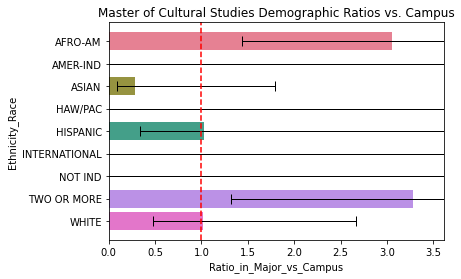

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
7,Master of Fine Arts in Creative Writing and Poetics,AFRO-AM,1,22,4.348,517,4750,9.816,0.442940,0.137823,3.062754,0.305117,2.619814
24,Master of Fine Arts in Creative Writing and Poetics,AMER-IND,0,23,0.000,14,5253,0.266,0.000000,0.474780,125.830314,0.474780,125.830314
41,Master of Fine Arts in Creative Writing and Poetics,ASIAN,3,20,13.043,1843,3424,34.991,0.372762,0.161778,1.119451,0.210984,0.746689
58,Master of Fine Arts in Creative Writing and Poetics,HAW/PAC,1,22,4.348,28,5239,0.532,8.178571,2.403155,57.914106,5.775416,49.735535
75,Master of Fine Arts in Creative Writing and Poetics,HISPANIC,1,22,4.348,511,4756,9.702,0.448141,0.139436,3.098768,0.308705,2.650627
92,Master of Fine Arts in Creative Writing and Poetics,INTERNATIONAL,1,22,4.348,295,4972,5.601,0.776271,0.240932,5.373356,0.535339,4.597084
109,Master of Fine Arts in Creative Writing and Poetics,NOT IND,1,22,4.348,189,5078,3.588,1.211640,0.374824,8.398665,0.836816,7.187025
126,Master of Fine Arts in Creative Writing and Poetics,TWO OR MORE,2,21,8.696,321,4946,6.095,1.426791,0.537421,5.652976,0.889371,4.226185
143,Master of Fine Arts in Creative Writing and Poetics,WHITE,13,10,56.522,1549,3718,29.410,1.921885,1.375522,2.772620,0.546363,0.850735


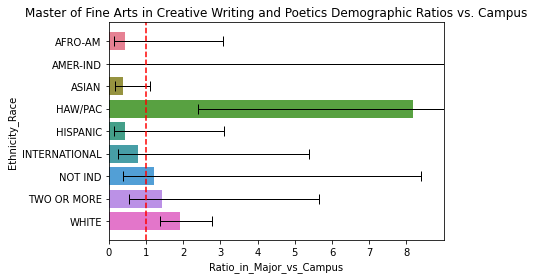

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
16,Master of Policy Studies,AFRO-AM,2,7,22.222,517,4750,9.816,2.263916,0.921366,7.787340,1.342550,5.523424
33,Master of Policy Studies,AMER-IND,0,9,0.000,14,5253,0.266,0.000000,1.226686,298.011093,1.226686,298.011093
50,Master of Policy Studies,ASIAN,1,8,11.111,1843,3424,34.991,0.317538,0.103837,1.960234,0.213701,1.642696
67,Master of Policy Studies,HAW/PAC,0,9,0.000,28,5239,0.532,0.000000,0.639133,148.054342,0.639133,148.054342
84,Master of Policy Studies,HISPANIC,0,9,0.000,511,4756,9.702,0.000000,0.036457,8.057960,0.036457,8.057960
101,Master of Policy Studies,INTERNATIONAL,0,9,0.000,295,4972,5.601,0.000000,0.063042,13.962232,0.063042,13.962232
118,Master of Policy Studies,NOT IND,0,9,0.000,189,5078,3.588,0.000000,0.098174,21.801569,0.098174,21.801569
135,Master of Policy Studies,TWO OR MORE,0,9,0.000,321,4946,6.095,0.000000,0.057955,12.830595,0.057955,12.830595
152,Master of Policy Studies,WHITE,6,3,66.667,1549,3718,29.410,2.266839,1.506979,3.590032,0.759860,1.323193


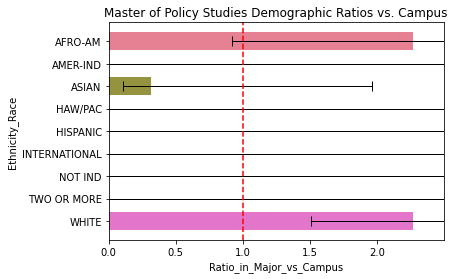

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
14,Mathematics,AFRO-AM,9,67,11.842,517,4750,9.816,1.206429,0.693226,2.304825,0.513203,1.098396
31,Mathematics,AMER-IND,0,76,0.000,14,5253,0.266,0.000000,0.142927,39.443417,0.142927,39.443417
48,Mathematics,ASIAN,23,53,30.263,1843,3424,34.991,0.864873,0.625668,1.231378,0.239205,0.366506
65,Mathematics,HAW/PAC,0,76,0.000,28,5239,0.532,0.000000,0.074428,19.606480,0.074428,19.606480
82,Mathematics,HISPANIC,3,73,3.947,511,4756,9.702,0.406865,0.168761,1.315401,0.238104,0.908537
99,Mathematics,INTERNATIONAL,2,74,2.632,295,4972,5.601,0.469848,0.171264,1.981455,0.298584,1.511607
116,Mathematics,NOT IND,4,72,5.263,189,5078,3.588,1.466722,0.660026,4.050717,0.806696,2.583994
133,Mathematics,TWO OR MORE,5,71,6.579,321,4946,6.095,1.079480,0.522937,2.653387,0.556544,1.573907
150,Mathematics,WHITE,30,46,39.474,1549,3718,29.410,1.342207,1.026033,1.790365,0.316174,0.448158


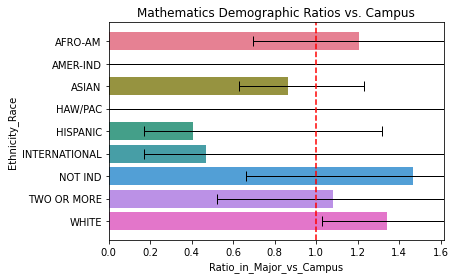

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
0,Mechanical Engineering,AFRO-AM,1,106,0.935,517,4750,9.816,0.095211,0.028928,0.697314,0.066283,0.602103
17,Mechanical Engineering,AMER-IND,0,107,0.000,14,5253,0.266,0.000000,0.101450,28.141416,0.101450,28.141416
34,Mechanical Engineering,ASIAN,46,61,42.991,1843,3424,34.991,1.228604,0.992264,1.539518,0.236341,0.310914
51,Mechanical Engineering,HAW/PAC,0,107,0.000,28,5239,0.532,0.000000,0.052828,13.988797,0.052828,13.988797
68,Mechanical Engineering,HISPANIC,11,96,10.280,511,4756,9.702,1.059623,0.634114,1.913944,0.425509,0.854321
85,Mechanical Engineering,INTERNATIONAL,3,104,2.804,295,4972,5.601,0.500586,0.205878,1.636075,0.294708,1.135489
102,Mechanical Engineering,NOT IND,2,105,1.869,189,5078,3.588,0.520892,0.188375,2.218350,0.332517,1.697458
119,Mechanical Engineering,TWO OR MORE,5,102,4.673,321,4946,6.095,0.766734,0.368851,1.905043,0.397883,1.138309
136,Mechanical Engineering,WHITE,39,68,36.449,1549,3718,29.410,1.239346,0.971322,1.606349,0.268024,0.367002


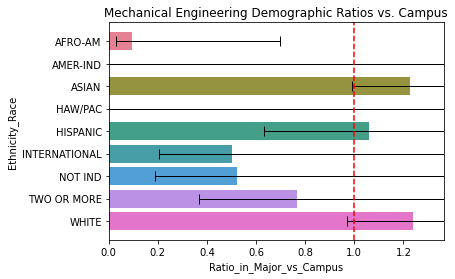

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
5,Nursing,AFRO-AM,30,137,17.964,517,4750,9.816,1.830112,1.330854,2.581237,0.499257,0.751126
22,Nursing,AMER-IND,1,166,0.599,14,5253,0.266,2.252780,0.609971,17.350698,1.642809,15.097918
39,Nursing,ASIAN,30,137,17.964,1843,3424,34.991,0.513385,0.376653,0.718706,0.136731,0.205321
56,Nursing,HAW/PAC,1,166,0.599,28,5239,0.532,1.126390,0.322786,8.487071,0.803604,7.360680
73,Nursing,HISPANIC,16,151,9.581,511,4756,9.702,0.987520,0.636908,1.615769,0.350612,0.628249
90,Nursing,INTERNATIONAL,1,166,0.599,295,4972,5.601,0.106912,0.032327,0.788276,0.074584,0.681364
107,Nursing,NOT IND,0,167,0.000,189,5078,3.588,0.000000,0.005193,1.325762,0.005193,1.325762
124,Nursing,TWO OR MORE,8,159,4.790,321,4946,6.095,0.786017,0.428230,1.614279,0.357787,0.828262
141,Nursing,WHITE,80,87,47.904,1549,3718,29.410,1.628866,1.388188,1.922825,0.240678,0.293959


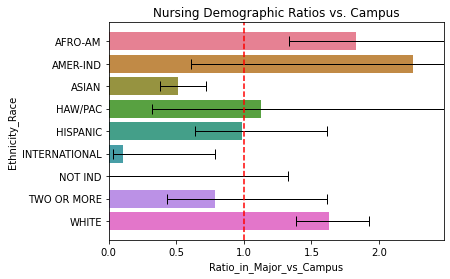

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
6,Physics,AFRO-AM,0,30,0.000,517,4750,9.816,0.000000,0.010665,2.610754,0.010665,2.610754
23,Physics,AMER-IND,0,30,0.000,14,5253,0.266,0.000000,0.363365,97.604499,0.363365,97.604499
40,Physics,ASIAN,7,23,23.333,1843,3424,34.991,0.666829,0.377001,1.309495,0.289829,0.642665
57,Physics,HAW/PAC,0,30,0.000,28,5239,0.532,0.000000,0.189240,48.511616,0.189240,48.511616
74,Physics,HISPANIC,4,26,13.333,511,4756,9.702,1.374299,0.644868,3.579910,0.729430,2.205611
91,Physics,INTERNATIONAL,2,28,6.667,295,4972,5.601,1.190282,0.443238,4.816570,0.747045,3.626287
108,Physics,NOT IND,2,28,6.667,189,5078,3.588,1.857848,0.689069,7.533698,1.168779,5.675849
125,Physics,TWO OR MORE,0,30,0.000,321,4946,6.095,0.000000,0.017153,4.205838,0.017153,4.205838
142,Physics,WHITE,15,15,50.000,1549,3718,29.410,1.700129,1.215453,2.455565,0.484676,0.755435


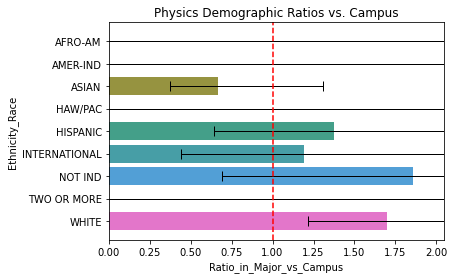

,Major1,Ethnicity_Race,Y,N,Percent,Y(Campus),N(Campus),Percent(Campus),Ratio_in_Major_vs_Campus,CI95_low,CI95_high,Lower_Error,Upper_Error
1,Psychology,AFRO-AM,8,105,7.080,517,4750,9.816,0.721247,0.397250,1.462753,0.323998,0.741505
18,Psychology,AMER-IND,0,113,0.000,14,5253,0.266,0.000000,0.096054,26.662716,0.096054,26.662716
35,Psychology,ASIAN,35,78,30.973,1843,3424,34.991,0.885172,0.678717,1.176791,0.206455,0.291619
52,Psychology,HAW/PAC,1,112,0.885,28,5239,0.532,1.664665,0.477952,12.483197,1.186713,10.818532
69,Psychology,HISPANIC,14,99,12.389,511,4756,9.702,1.277003,0.807830,2.142604,0.469173,0.865601
86,Psychology,INTERNATIONAL,5,108,4.425,295,4972,5.601,0.790010,0.379411,1.966608,0.410599,1.176597
103,Psychology,NOT IND,6,107,5.310,189,5078,3.588,1.479702,0.744919,3.401862,0.734783,1.922160
120,Psychology,TWO OR MORE,7,106,6.195,321,4946,6.095,1.016431,0.537795,2.179522,0.478636,1.163091
137,Psychology,WHITE,37,76,32.743,1549,3718,29.410,1.113359,0.861516,1.464311,0.251843,0.350952


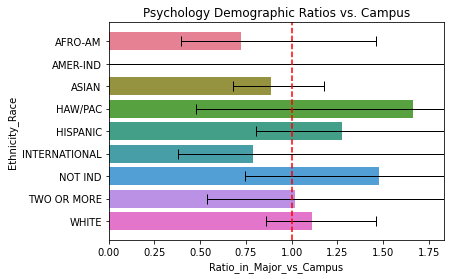

In [283]:
unique_demographic_values = sorted(list(graph_data[demographic_col].unique()))
unique_majors = sorted(list(graph_data['Major1'].unique()))

for major in unique_majors:
    curr_graph_data = graph_data[graph_data['Major1'] == major]
    display(HTML(curr_graph_data.to_html()))
    palette = sns.color_palette("husl", len(unique_demographic_values))
    
    ax = sns.barplot(x='Ratio_in_Major_vs_Campus', y=f'{demographic_col}',\
        data=curr_graph_data,palette=palette,ci=None,orient="h")
    plt.title(f"{major} Demographic Ratios vs. Campus")
    plt.axvline(x=1, color='red', linestyle='--', label='Campus average')
    plt.xticks,rotation="90"
    graph_output_file = join(output_dir,f"{major}_demographic_ratios")
    
    errors = [curr_graph_data["Lower_Error"],curr_graph_data["Upper_Error"]]
    ax.errorbar(data=curr_graph_data, x='Ratio_in_Major_vs_Campus', y= f'{demographic_col}',\
                xerr=errors, ls='', lw=1, color='black',capsize=5)
    ax.set_xlim(left=0,right=max(curr_graph_data['Ratio_in_Major_vs_Campus'])*1.1)
    plt.savefig(graph_output_file)
    plt.show()
  